<a href="https://colab.research.google.com/github/Gunanana/AIML/blob/main/BetterLifeIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Better Life Index. Predicting the Life satisfaction based on only 1 feature - *GDP per Capita 2015*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
# Import csv files
bli = pd.read_csv('/BetterLifeIndex2015.csv')
gdp_alltime = pd.read_csv('/gdp_all_time.csv')

In [ ]:
print(bli.shape)
print(gdp_alltime.shape)
gdp_alltime.rename(columns={'Country Name':'Country'}, inplace=True)
print(gdp_alltime.columns)
print(bli.columns)

(36, 25)
(266, 68)
Index(['Country', 'Country Code', 'Indicator Name', 'Indicator Code', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')
Index(['Country', '  Dwellings without basic facilities',
       '  Housing expenditure', '  Rooms per person',
       '  Household net adjusted disposable income',
       '  Household net financial wealth', '  Employment rate',
       '  Job security', '  Long-term unemployment rate',
       '  Personal earnings', '  Quality

In [ ]:
# function to prepare the DataFrame

def prepare_country_stats(bli, gdp):
  # 'inner' merge only selects countries which both dataset have
  country_stats = pd.merge(bli, gdp, on='Country', how='inner')

  country_stats = country_stats.dropna()

  country_stats = country_stats[['Country', '2015', '  Life satisfaction']]

  country_stats.rename(columns={'2015':'GDP per capita 2015', '  Life satisfaction':'Life Satisfaction'}, inplace=True)

  country_stats.set_index('Country', inplace=True)

  return country_stats

In [ ]:
country_stats = prepare_country_stats(bli, gdp_alltime)
# print(type(country_stats))
print(country_stats.head())

           GDP per capita 2015  Life Satisfaction
Country                                          
Australia          56758.86920                7.3
Austria            44195.81759                6.9
Belgium            41008.29672                6.9
Canada             43594.19410                7.3
Chile              13567.35722                6.7


In [ ]:
# Prepare the Data
X = pd.DataFrame(country_stats['GDP per capita 2015'])
y = pd.DataFrame(country_stats['Life Satisfaction'])

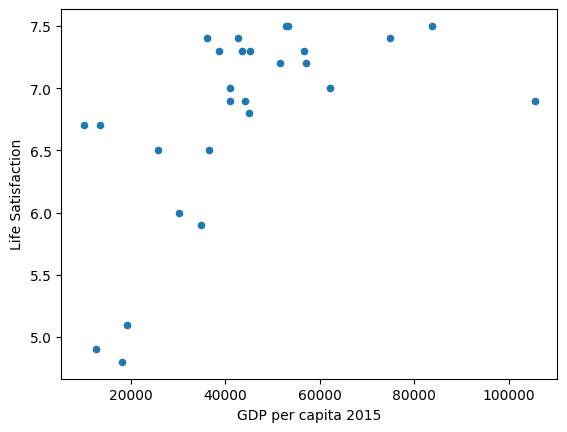

In [ ]:
# Visualize the Data
country_stats.plot(kind='scatter', x='GDP per capita 2015', y='Life Satisfaction')
plt.show()

In [ ]:
# Since the relationship is not linear, we can fit a polynomial function
poly = PolynomialFeatures(degree=5)
X_poly = pd.DataFrame(poly.fit_transform(X))

print(X_poly.head())

     0            1             2             3             4             5
0  1.0  56758.86920  3.221569e+09  1.828526e+14  1.037851e+19  5.890724e+23
1  1.0  44195.81759  1.953270e+09  8.632638e+13  3.815265e+18  1.686187e+23
2  1.0  41008.29672  1.681680e+09  6.896285e+13  2.828049e+18  1.159735e+23
3  1.0  43594.19410  1.900454e+09  8.284875e+13  3.611724e+18  1.574502e+23
4  1.0  13567.35722  1.840732e+08  2.497387e+12  3.388294e+16  4.597019e+20


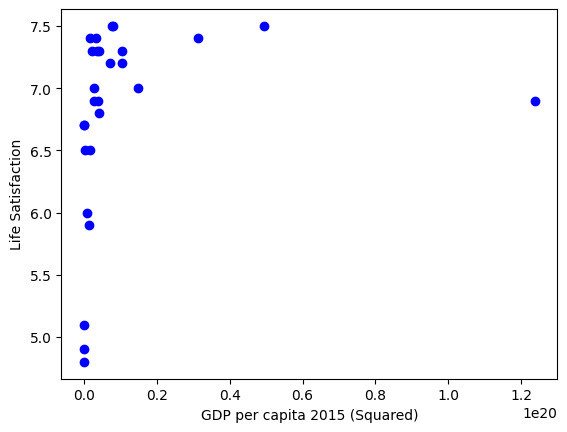

In [ ]:
X_squared = X_poly.iloc[:,4]
plt.scatter(X_squared, y, color='blue')
plt.xlabel('GDP per capita 2015 (Squared)')
plt.ylabel('Life Satisfaction')
plt.show()

In [ ]:
# Fit a Linear model

model = LinearRegression()
model.fit(X_poly, y)

mae = mean_absolute_error(model.predict(X_poly), y)
print(mae)

0.40399732002308925
